In [1]:
import os, sys, warnings

cur_dir = os.path.dirname(os.getcwd())
sys.path.append(cur_dir)

from src.utils import load_data, process_data, train_and_evaluate_model


In [2]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

BASE_DATA_DIR = os.path.dirname(os.getcwd())
df_train, df_test = load_data(base_data_dir=BASE_DATA_DIR)
target_variable = 'attack_cat'

# Testing multiclass

In [4]:
# without synthetic augmentation
X_train_base, y_train_base, X_test_base, y_test_base, le_target = process_data(
    df_train, 
    df_test, 
    target_variable=target_variable, 
    use_synthetic=False
)

model_base = train_and_evaluate_model(
    X_train_base, 
    y_train_base, 
    X_test_base, 
    y_test_base, 
    le_target,
    model_label="Without Synthetic Data",
    epochs = 15
)

number of classes: 10
Training model Without Synthetic Data using Cross Entropy
Epoch 1/15, Loss: 0.6669
Epoch 2/15, Loss: 0.5560
Epoch 3/15, Loss: 0.5290
Epoch 4/15, Loss: 0.5123
Epoch 5/15, Loss: 0.5015
Epoch 6/15, Loss: 0.4936
Epoch 7/15, Loss: 0.4872
Epoch 8/15, Loss: 0.4822
Epoch 9/15, Loss: 0.4781
Epoch 10/15, Loss: 0.4752
Epoch 11/15, Loss: 0.4719
Epoch 12/15, Loss: 0.4695
Epoch 13/15, Loss: 0.4673
Epoch 14/15, Loss: 0.4649
Epoch 15/15, Loss: 0.4631

Test Accuracy: 74.95%

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.02      0.01      0.01       583
           DoS       0.43      0.18      0.25      4089
      Exploits       0.59      0.83      0.69     11132
       Fuzzers       0.27      0.63      0.38      6062
       Generic       1.00      0.96      0.98     18871
        Normal       0.96      0.73      0.83     36978
Reconnaissance       0.70      0.81      0.

In [5]:
# with synthetic augmentation from CTGAN
X_train_ctgan, y_train_ctgan, X_test_ctgan, y_test_ctgan, le_target = process_data(
    df_train, 
    df_test, 
    target_variable=target_variable, 
    use_synthetic=True,
    gan_augmentor="CTGAN"
)
    
model_syn = train_and_evaluate_model(
    X_train_ctgan, 
    y_train_ctgan, 
    X_test_ctgan, 
    y_test_ctgan, 
    le_target,
    model_label="With Synthetic Data",
    epochs = 15
)

Generating synthetic data for category:  Analysis
Metadata error for Analysis: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category:  Backdoor
Metadata error for Backdoor: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category:  Shellcode
Metadata error for Shellcode: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category:  Worms
Metadata error for Worms: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
number of classes: 10
Training model With Synthetic Data using Cross Entropy
Epoch 1/15, Loss: 0.6737
Epoch 2/15, Loss: 0.5581
Epoch 3/15, Loss: 0.5325
Epoch 4/15, Loss: 0.5169
Epoch 5/15, Loss: 0.5077
Epoch 6/15, Loss: 0.4996
Epoch 7/15, Loss: 0.4932
Epoch 8/15, Loss: 0.4881
Epoch 9/15, Loss: 0.4835
Epoch 10/15, Loss: 0.4792


In [6]:
# with synthetic augmentation from TVAE
X_train_tvae, y_train_tvae, X_test_tvae, y_test_tvae, le_target = process_data(
    df_train, 
    df_test, 
    target_variable=target_variable, 
    use_synthetic=True,
    gan_augmentor="TVAE"
)

model_tvae = train_and_evaluate_model(
    X_train_tvae, 
    y_train_tvae, 
    X_test_tvae, 
    y_test_tvae, 
    le_target,
    model_label="With Synthetic Data (TVAE)",
    epochs = 15
)

Metadata error for Analysis: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
Metadata error for Backdoor: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
Metadata error for Shellcode: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
Metadata error for Worms: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
number of classes: 10
Training model With Synthetic Data (TVAE) using Cross Entropy
Epoch 1/15, Loss: 0.6661
Epoch 2/15, Loss: 0.5573
Epoch 3/15, Loss: 0.5315
Epoch 4/15, Loss: 0.5161
Epoch 5/15, Loss: 0.5050
Epoch 6/15, Loss: 0.4971
Epoch 7/15, Loss: 0.4919
Epoch 8/15, Loss: 0.4856
Epoch 9/15, Loss: 0.4821
Epoch 10/15, Loss: 0.4781
Epoch 11/15, Loss: 0.4750
Epoch 12/15, Loss: 0.4724
Epoch 13/15, Loss: 0.4701
Epoch 14/15, Loss: 0.4673
Epoch 15/15, Loss: 0.4656

Test Accuracy: 75.12%

Classification Report:
              

# Testing Binary Classes

In [7]:
# with synthetic augmentation from CTGAN
X_train_ctgan, y_train_ctgan, X_test_ctgan, y_test_ctgan, le_target = process_data(
    df_train, 
    df_test, 
    target_variable='label', 
    use_synthetic=True,
    gan_augmentor="CTGAN"
)
    
model_syn = train_and_evaluate_model(
    X_train_ctgan, 
    y_train_ctgan, 
    X_test_ctgan, 
    y_test_ctgan, 
    le_target,
    model_label="With Synthetic Data",
    epochs = 15
)

number of classes: 2
Training model With Synthetic Data using Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.1537
Epoch 2/15, Loss: 0.1275
Epoch 3/15, Loss: 0.1219
Epoch 4/15, Loss: 0.1188
Epoch 5/15, Loss: 0.1163
Epoch 6/15, Loss: 0.1146
Epoch 7/15, Loss: 0.1130
Epoch 8/15, Loss: 0.1117
Epoch 9/15, Loss: 0.1105
Epoch 10/15, Loss: 0.1099
Epoch 11/15, Loss: 0.1096
Epoch 12/15, Loss: 0.1079
Epoch 13/15, Loss: 0.1073
Epoch 14/15, Loss: 0.1066
Epoch 15/15, Loss: 0.1063

Test Accuracy: 84.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     36978
           1       0.79      0.98      0.88     45332

    accuracy                           0.85     82310
   macro avg       0.88      0.83      0.84     82310
weighted avg       0.87      0.85      0.84     82310



In [ ]:
# with synthetic augmentation from CTGAN
X_train_ctgan, y_train_ctgan, X_test_ctgan, y_test_ctgan, le_target = process_data(
    df_train, 
    df_test, 
    target_variable='label', 
    use_synthetic=True,
    gan_augmentor="CTGAN"
)
    
model_syn = train_and_evaluate_model(
    X_train_ctgan, 
    y_train_ctgan, 
    X_test_ctgan, 
    y_test_ctgan, 
    le_target,
    model_label="With Synthetic Data",
    epochs = 15
)

number of classes: 2
Training model With Synthetic Data using Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.1533


number of classes: 2
Training model With Synthetic Data (TVAE) using Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.1588
Epoch 2/15, Loss: 0.1308
Epoch 3/15, Loss: 0.1263
Epoch 4/15, Loss: 0.1232
Epoch 5/15, Loss: 0.1203
Epoch 6/15, Loss: 0.1178
Epoch 7/15, Loss: 0.1164
Epoch 8/15, Loss: 0.1149
Epoch 9/15, Loss: 0.1137
Epoch 10/15, Loss: 0.1126
Epoch 11/15, Loss: 0.1121
Epoch 12/15, Loss: 0.1114
Epoch 13/15, Loss: 0.1109
Epoch 14/15, Loss: 0.1100
Epoch 15/15, Loss: 0.1096

Test Accuracy: 85.11%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     36978
           1       0.80      0.98      0.88     45332

    accuracy                           0.85     82310
   macro avg       0.88      0.84      0.84     82310
weighted avg       0.87      0.85      0.85     82310



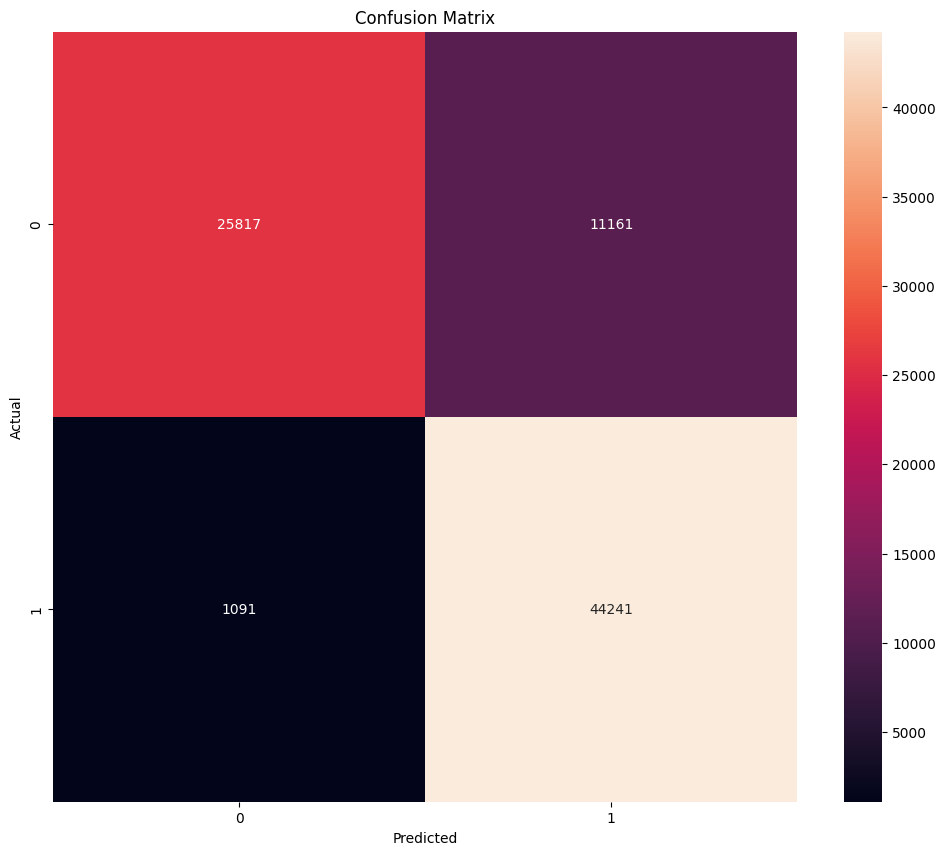

In [ ]:
# with synthetic augmentation from TVAE
X_train_tvae, y_train_tvae, X_test_tvae, y_test_tvae, le_target = process_data(
    df_train, 
    df_test, 
    target_variable='label', 
    use_synthetic=True,
    gan_augmentor="TVAE"
)

model_tvae = train_and_evaluate_model(
    X_train_tvae, 
    y_train_tvae, 
    X_test_tvae, 
    y_test_tvae, 
    le_target,
    model_label="With Synthetic Data (TVAE)",
    epochs = 15
)